In [1]:
from pandas import options
options.display.max_rows = 8

# Getting started with

<img src="https://raw.githubusercontent.com/biosustain/cameo/gh-pages/cameo_logo.png" style="height:50px;text-align:left; margin-left: 0px;"/>

**c**omputer **a**ided **m**etabolic **e**ngineering and **o**ptimization

**cameo** reuses and extends model data structures defined by [cobrapy](https://opencobra.github.io/cobrapy/) (**CO**nstraints-**B**ased **R**econstruction and **A**nalysis tool for **Py**thon). So, in addition to following this quick start guide and other **cameo** tutorials, we encourage you to explore cobrapy's [documentation](https://cobrapy.readthedocs.org/en/latest/cobra.core.html) as well.

Step 1: Load a model
-------------------

Loading a model is easy. Just import the `load_model` function.


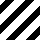
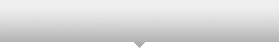
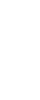
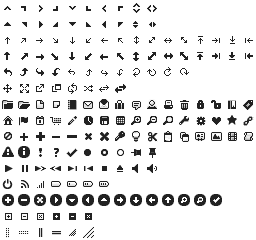
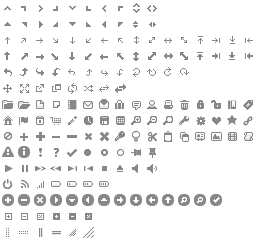
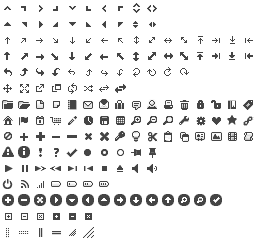
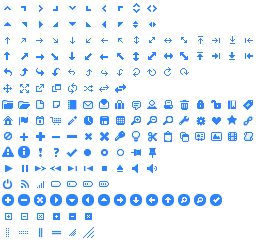
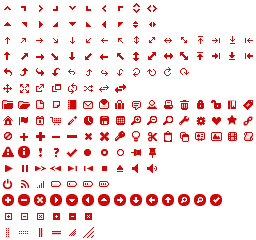
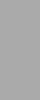
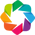
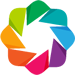
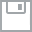
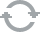
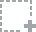
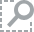
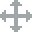
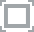
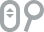

In [2]:
from cameo import load_model

For example, load the most current genome-scale metabolic reconstruction of _Escherichia coli_.

In [3]:
model = load_model("iJO1366")

Models, reactions, metabolites, etc., provide return HTML when evaluated in Jupyter notebooks and can thus be easily inspected.

In [4]:
model

<SolverBasedModel iJO1366 at 0x11478aef0>

## Step 2: Simulate a model

The model can be simulated by executing `model.solve()`.

In [5]:
solution = model.solve()

A quick overview of the solution can be obtained in form of a pandas [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) (all solution objects in cameo provide access to data frames through a `data_frame` attribute).

In [6]:
solution

The data frame is accessible through `solution.data_frame`.

In [7]:
solution.data_frame

fluxes  reduced_costs
DM_4CRSOL  0.000219       0.000219
DM_5DRIB   0.000221       0.000221
DM_AACALD  0.000000       0.000000
DM_AMOB    0.000002       0.000002
...             ...            ...
ZN2t3pp    0.000000       0.000000
ZN2tpp     0.000335       0.000335
ZNabcpp    0.000000       0.000000
Zn2tex     0.000335       0.000335

[2583 rows x 2 columns]

Data frames make it very easy to process results. For example, let's take a look at reactions with flux != 0

In [8]:
solution.data_frame.query('fluxes != 0')

fluxes  reduced_costs
DM_4CRSOL  0.000219       0.000219
DM_5DRIB   0.000221       0.000221
DM_AMOB    0.000002       0.000002
DM_MTHTHF  0.000440       0.000440
...             ...            ...
USHD       0.019113       0.019113
VALTA     -0.415702      -0.415702
ZN2tpp     0.000335       0.000335
Zn2tex     0.000335       0.000335

[446 rows x 2 columns]

## Step 3: Exploring a model

Objects—models, reactions, metabolites, genes—can easily be explored in the Jupyter notebook, taking advantage of tab completion. For example, place your cursor after the period in `model.reactions.` and press the TAB key. A dialog will appear that allows you to navigate the list of reactions encoded in the model. 

In [ ]:
model.reactions. # place your cursor after the period and press the TAB key.

For example, you can access the E4PD (_Erythrose 4-phosphate dehydrogenase_) reaction in the model.

In [10]:
model.reactions.E4PD

<Reaction E4PD at 0x114b117f0>

Be aware though that due variable naming restrictions in Python dot notation access to reactions (and other objects) might not work in some cases.

In [11]:
model.reactions.12DGR120tipp

SyntaxError: invalid syntax (<ipython-input-11-fa7ea4193315>, line 1)

In these cases you need to use the `model.reactions.get_by_id`.

In [12]:
model.reactions.get_by_id('12DGR120tipp')

<Reaction 12DGR120tipp at 0x112a532b0>

Metabolites are accessible through `model.metabolites`. For example, D-glucose in the cytosolic compartment.

In [13]:
model.metabolites.glc_dsh_D_c

<Metabolite glc_dsh_D_c at 0x112a22f98>

A list of the genes encoded in the model can be accessed via `model.genes`.

In [14]:
model.genes

[<Gene b1377 at 0x112b65208>,
 <Gene b2215 at 0x112b65240>,
 <Gene b0929 at 0x112b651d0>,
 <Gene b0241 at 0x112b65278>,
 <Gene b4033 at 0x112b65588>,
 <Gene b4034 at 0x112b65630>,
 <Gene b4032 at 0x112b655c0>,
 <Gene b4035 at 0x112b655f8>,
 <Gene b4036 at 0x112b65518>,
 <Gene b4213 at 0x112b65cc0>,
 <Gene b2835 at 0x112b65f98>,
 <Gene b2836 at 0x112b6ea58>,
 <Gene b3553 at 0x112b78898>,
 <Gene b1134 at 0x112b78c88>,
 <Gene b0446 at 0x112b78cc0>,
 <Gene b1009 at 0x112b78e48>,
 <Gene b0954 at 0x112b7f400>,
 <Gene b0180 at 0x112b7f3c8>,
 <Gene b0347 at 0x112b7fe48>,
 <Gene b3580 at 0x112b88240>,
 <Gene b1093 at 0x112b886a0>,
 <Gene b2323 at 0x112b8e240>,
 <Gene b1095 at 0x112b8e278>,
 <Gene b1397 at 0x112b8eba8>,
 <Gene b1246 at 0x112b8ee80>,
 <Gene b1247 at 0x112b8ef28>,
 <Gene b1329 at 0x112b8eeb8>,
 <Gene b1244 at 0x112b8ef60>,
 <Gene b1245 at 0x112b8eef0>,
 <Gene b1386 at 0x112b96208>,
 <Gene b0004 at 0x112b96400>,
 <Gene b1192 at 0x112b964e0>,
 <Gene b1243 at 0x112b96748>,
 <Gene b42

A few additional attributes have been added that are not available in a [cobrapy](https://opencobra.github.io/cobrapy/) model. For example, exchange reactions that allow certain metabolites to enter or leave the model can be accessed through `model.exchanges`.

In [15]:
model.exchanges

[<Reaction DM_4CRSOL at 0x112d5a4e0>,
 <Reaction DM_5DRIB at 0x112d5a518>,
 <Reaction DM_AACALD at 0x112d5a550>,
 <Reaction DM_AMOB at 0x112d5a358>,
 <Reaction DM_MTHTHF at 0x112d5a390>,
 <Reaction DM_OXAM at 0x112d5a3c8>,
 <Reaction EX_12ppd_dsh_R_lp_e_rp_ at 0x112d5a240>,
 <Reaction EX_12ppd_dsh_S_lp_e_rp_ at 0x112d5a278>,
 <Reaction EX_14glucan_lp_e_rp_ at 0x112d5a2b0>,
 <Reaction EX_15dap_lp_e_rp_ at 0x112d5a2e8>,
 <Reaction EX_23camp_lp_e_rp_ at 0x112d5a320>,
 <Reaction EX_23ccmp_lp_e_rp_ at 0x112d5a048>,
 <Reaction EX_23cgmp_lp_e_rp_ at 0x112d5a0f0>,
 <Reaction EX_23cump_lp_e_rp_ at 0x112d5a1d0>,
 <Reaction EX_23dappa_lp_e_rp_ at 0x112d5a208>,
 <Reaction EX_26dap_dsh_M_lp_e_rp_ at 0x11215dbe0>,
 <Reaction EX_2ddglcn_lp_e_rp_ at 0x11215dcf8>,
 <Reaction EX_34dhpac_lp_e_rp_ at 0x11215de10>,
 <Reaction EX_3amp_lp_e_rp_ at 0x11215def0>,
 <Reaction EX_3cmp_lp_e_rp_ at 0x11215deb8>,
 <Reaction EX_3gmp_lp_e_rp_ at 0x11215de80>,
 <Reaction EX_3hcinnm_lp_e_rp_ at 0x1121cf400>,
 <Reaction 

Or, the current medium can be accessed through `model.medium`.

In [16]:
model.medium

reaction_id          reaction_name  lower_bound  upper_bound
0     EX_ca2_lp_e_rp_       Calcium exchange     -1000.00         1000
1    EX_cbl1_lp_e_rp_  Cob(I)alamin exchange        -0.01         1000
2      EX_cl_lp_e_rp_      Chloride exchange     -1000.00         1000
3     EX_co2_lp_e_rp_           CO2 exchange     -1000.00         1000
..                ...                    ...          ...          ...
21   EX_slnt_lp_e_rp_      selenite exchange     -1000.00         1000
22    EX_so4_lp_e_rp_       Sulfate exchange     -1000.00         1000
23  EX_tungs_lp_e_rp_     tungstate exchange     -1000.00         1000
24    EX_zn2_lp_e_rp_          Zinc exchange     -1000.00         1000

[25 rows x 4 columns]

It is also possible to get a list of essential reactions ...

In [17]:
model.essential_reactions()

[<Reaction DM_4CRSOL at 0x112d5a4e0>,
 <Reaction DM_5DRIB at 0x112d5a518>,
 <Reaction DM_AMOB at 0x112d5a358>,
 <Reaction DM_MTHTHF at 0x112d5a390>,
 <Reaction Ec_biomass_iJO1366_core_53p95M at 0x112d5a438>,
 <Reaction EX_ca2_lp_e_rp_ at 0x112a9b278>,
 <Reaction EX_cl_lp_e_rp_ at 0x112a3b358>,
 <Reaction EX_cobalt2_lp_e_rp_ at 0x112a04a58>,
 <Reaction EX_cu2_lp_e_rp_ at 0x112aaea90>,
 <Reaction EX_glc_lp_e_rp_ at 0x112ae2940>,
 <Reaction EX_k_lp_e_rp_ at 0x112af10f0>,
 <Reaction EX_meoh_lp_e_rp_ at 0x112aa0f60>,
 <Reaction EX_mg2_lp_e_rp_ at 0x112a90ba8>,
 <Reaction EX_mn2_lp_e_rp_ at 0x112a90898>,
 <Reaction EX_mobd_lp_e_rp_ at 0x112a420f0>,
 <Reaction EX_nh4_lp_e_rp_ at 0x112aaada0>,
 <Reaction EX_ni2_lp_e_rp_ at 0x112aaa128>,
 <Reaction EX_pi_lp_e_rp_ at 0x112a22f28>,
 <Reaction EX_so4_lp_e_rp_ at 0x112b07320>,
 <Reaction EX_zn2_lp_e_rp_ at 0x112a53fd0>,
 <Reaction 3OAR140 at 0x114bed630>,
 <Reaction 3OAS140 at 0x114be5da0>,
 <Reaction 5DOAN at 0x114bdf0b8>,
 <Reaction A5PISO at 0x1

... and essential genes.

In [18]:
model.essential_genes()

[<Gene b0420 at 0x1149140b8>,
 <Gene b2400 at 0x1149b0160>,
 <Gene b2153 at 0x1149d4160>,
 <Gene b0475 at 0x114940198>,
 <Gene b4245 at 0x11486c1d0>,
 <Gene b3939 at 0x114b84208>,
 <Gene b1277 at 0x1149d4278>,
 <Gene b2574 at 0x11486c2b0>,
 <Gene b0774 at 0x112bf8358>,
 <Gene b1281 at 0x114adc3c8>,
 <Gene b2530 at 0x114a00400>,
 <Gene b2472 at 0x114b78400>,
 <Gene b1288 at 0x1149144a8>,
 <Gene b0777 at 0x114a4c4e0>,
 <Gene b3807 at 0x114a00518>,
 <Gene b1098 at 0x11490c550>,
 <Gene b3994 at 0x112bf8588>,
 <Gene b2019 at 0x1148705f8>,
 <Gene b3040 at 0x1148885f8>,
 <Gene b1093 at 0x112b886a0>,
 <Gene b1092 at 0x114a5c710>,
 <Gene b3843 at 0x114adc7f0>,
 <Gene b2311 at 0x114adc828>,
 <Gene b0928 at 0x11486c898>,
 <Gene b3634 at 0x114b44898>,
 <Gene b1136 at 0x114a009b0>,
 <Gene b0179 at 0x114bc89b0>,
 <Gene b2600 at 0x114890a20>,
 <Gene b2599 at 0x114890a58>,
 <Gene b0784 at 0x114a84a90>,
 <Gene b0085 at 0x114bc8ac8>,
 <Gene b3633 at 0x114a84b38>,
 <Gene b2329 at 0x114890b70>,
 <Gene b06